In [55]:
import sys
sys.path.append('modules')

import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
from data_utils import *
import matplotlib.image as mpimg

In [35]:
satellite_dirs = sorted([d for d in os.listdir("results") if "satellite" in d])
metrics_files = [os.path.join("results", sd, "metrics.pkl") for sd in satellite_dirs]

# metrics_files = [f for f in metrics_files if not "_0_p2_" in f]

metrics = list(range(len(metrics_files)))

for i, mf in enumerate(metrics_files):
    with open(mf, "rb") as f:
        metrics[i] = pickle.load(f)

In [36]:
psnr_array_grouped = np.array([metric["psnr_array"] for metric in metrics])
bpp_array_grouped = np.array([metric["bits_per_pixel_array"] for metric in metrics])

psnr_last = [psnr[-1] for psnr in psnr_array_grouped]
bpp_last = [bpp[-1] for bpp in bpp_array_grouped]

psnr_array = np.concatenate(psnr_array_grouped)
bpp_array = np.concatenate(bpp_array_grouped)

In [37]:
idxs = np.argsort(bpp_array)

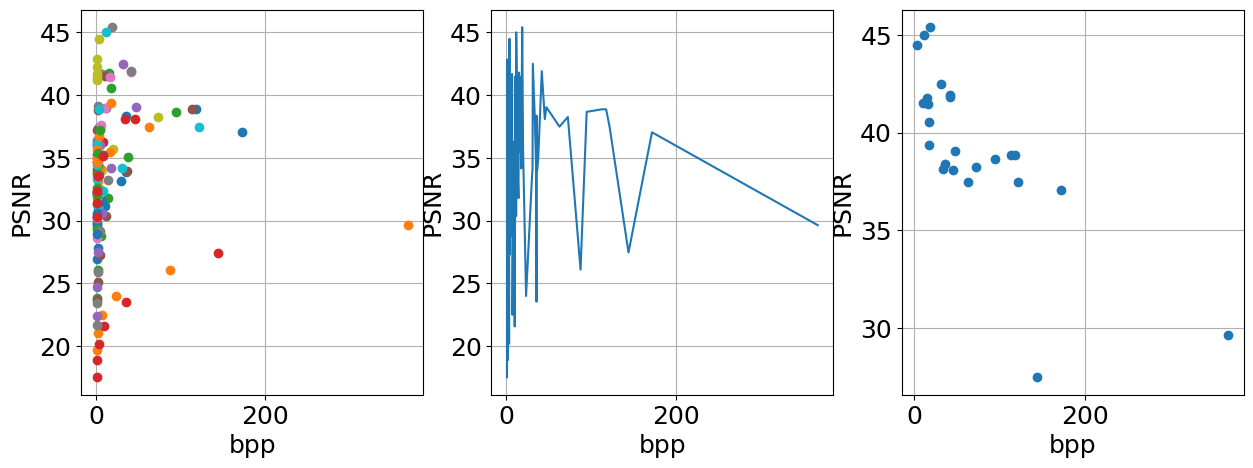

In [38]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))

axes[0].plot(bpp_array_grouped.T, psnr_array_grouped.T, 'o')
axes[0].set_xlabel("bpp")
axes[0].set_ylabel("PSNR");
axes[0].grid()

axes[1].plot(bpp_array[idxs], psnr_array[idxs])
axes[1].set_xlabel("bpp")
axes[1].set_ylabel("PSNR")
axes[1].grid();

axes[2].plot(bpp_last, psnr_last, 'o')
axes[2].set_xlabel("bpp")
axes[2].set_ylabel("PSNR");
axes[2].grid()

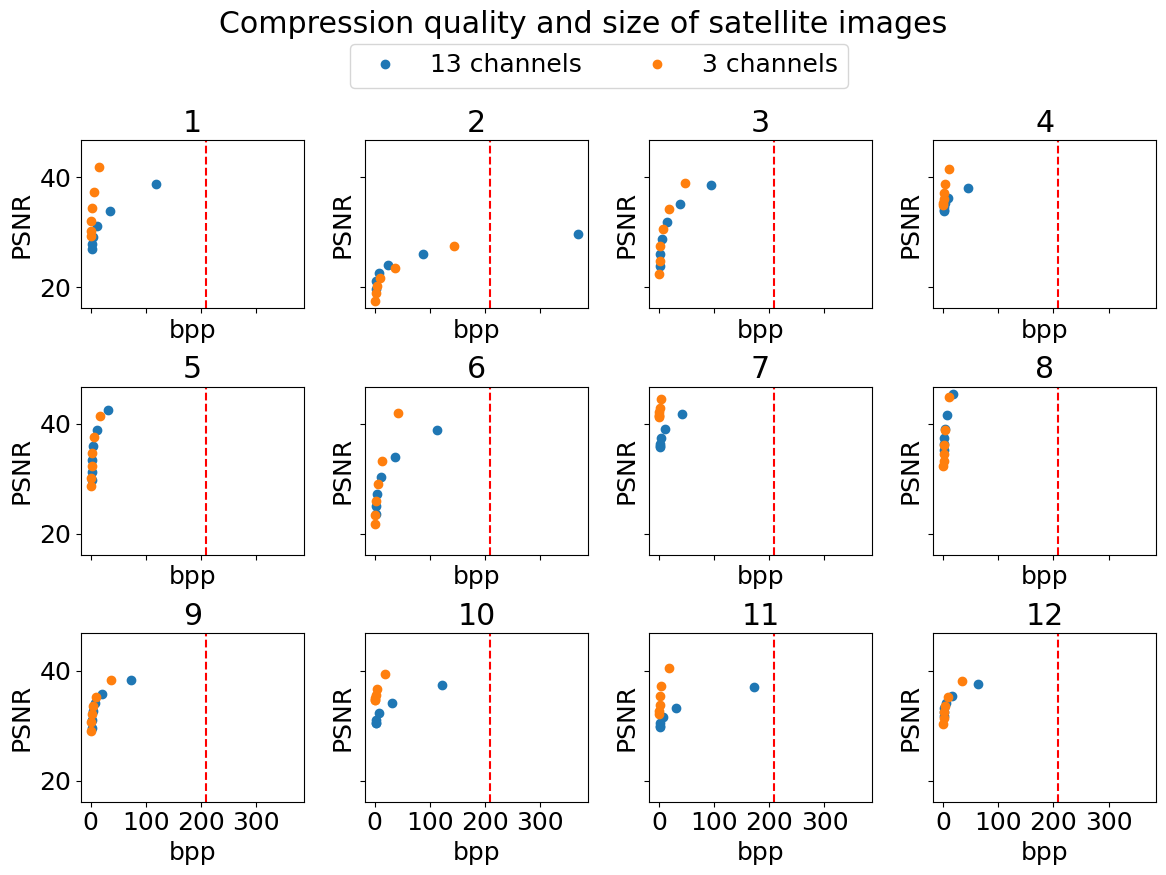

In [81]:
font = {'size'   : 18}

plt.rc('font', **font)


n = psnr_array_grouped.shape[0]

psnr_array_grouped_13_vs_3 = list(zip(psnr_array_grouped[:n//2], psnr_array_grouped[n//2:]))
bpp_array_grouped_13_vs_3 = list(zip(bpp_array_grouped[:n//2], bpp_array_grouped[n//2:]))

rows = int(np.floor(np.sqrt(n // 2)))
cols = int(np.ceil(np.sqrt(n // 2)))
fig, axes = plt.subplots(rows, cols, figsize = (3 * cols, 3 * rows), sharex= True, sharey = True)

for row in range(rows):
    for col in range(cols):
        index = col + cols * row
        ax = axes[row, col]
        
        if index < n // 2:
            
            psnr_13, psnr_3 = psnr_array_grouped_13_vs_3[index]
            bpp_13, bpp_3 = bpp_array_grouped_13_vs_3[index]

            ax.plot(bpp_13.T, psnr_13, 'o', label="13 channels")
            ax.plot(bpp_3.T, psnr_3, 'o', label = "3 channels")
            # ax.legend()
            ax.set_xlabel("bpp")
            ax.set_ylabel("PSNR")
            ax.set_xticks([0, 100, 200, 300])

            ax.axvline(x = 13 * 16, color = 'r', linestyle = "--")
            
            ax.set_title(f"{index + 1}")
            
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.3, 0.9), ncol = 10)
fig.suptitle("Compression quality and size of satellite images\n");
fig.tight_layout(h_pad=0.5)
fig.savefig(os.path.join("plots", "MINER_compression_metrics.pdf"), bbox_inches='tight')
# fig.tight_layout()

In [82]:
13 * 16 / 100

2.08

In [85]:
def displayImages(images, title, save_name):

    font = {'size'   : 18}

    plt.rc('font', **font)


    n = images.shape[0]

    rows = int(np.floor(np.sqrt(n)))
    cols = int(np.ceil(np.sqrt(n)))
    fig, axes = plt.subplots(rows, cols, figsize = (3 * cols, 3 * rows), sharex= True, sharey = True)

    for row in range(rows):
        for col in range(cols):
            index = col + cols * row
            ax = axes[row, col]
                
            ax.imshow(images[index])
            
            ax.tick_params(
                axis='x',          
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False) 
            ax.tick_params(
                axis='y',          
                which='both',      
                left=False,      
                top=False,         
                labelleft=False)
            
            ax.set_title(f"{index + 1}")
            
                
        fig.suptitle(title);
        fig.savefig(os.path.join("plots", save_name + ".pdf"), bbox_inches='tight')
        fig.savefig(os.path.join("plots", save_name + ".png"), bbox_inches='tight')
        fig.show()

In [86]:
TC_images = []

for satellite_part in [1, 2]:
    root_dir = os.path.join(os.getcwd(), "..", "data", f"Sat_{satellite_part}", "np_downscaled_and_cropped")
    satellite_dataset = SatelliteDataset(root_dir)
    for im in satellite_dataset:
        TC_images.append(np.array(im[TRUE_COLOR]).T)
        
TC_images = np.array([im.swapaxes(0, 1) / np.max(im) for im in TC_images])

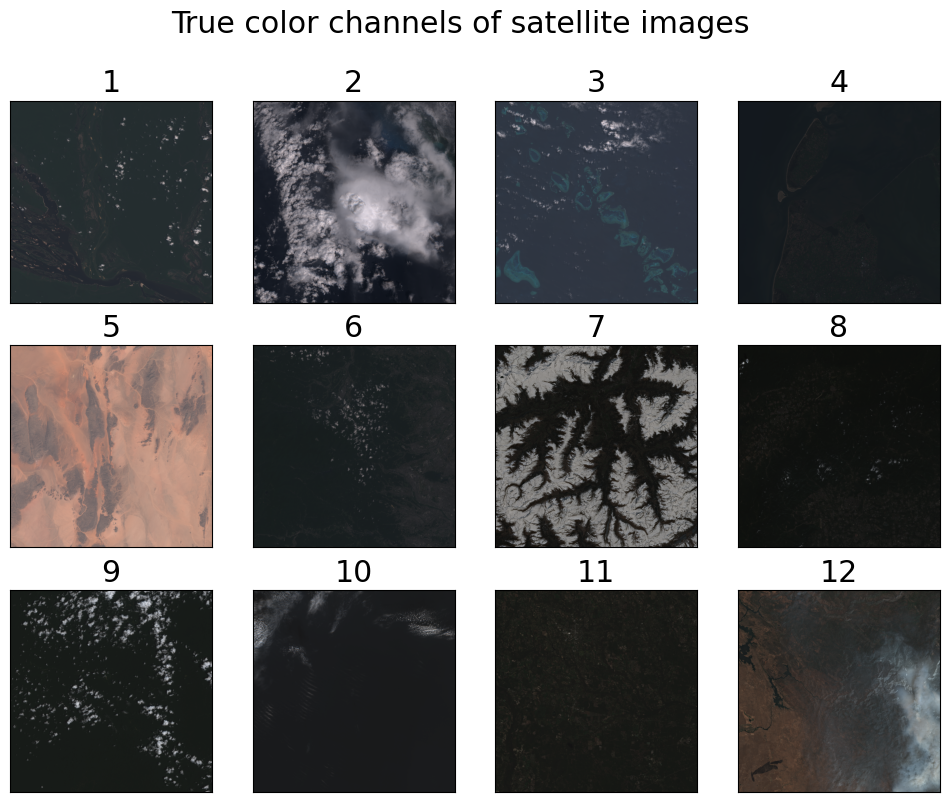

In [87]:
displayImages(TC_images, "True color channels of satellite images", "True_color_images")

In [49]:
images = []

for satellite_part in [1, 2]:
    root_dir = os.path.join(os.getcwd(), "..", "data", f"Sat_{satellite_part}", "tci-previews")
    print(os.listdir(root_dir))


['S2B_MSIL1C_20190902T154549_N0208_R111_T18QVM_20190902T203822-ql.jpg', 'S2B_MSIL1C_20230927T142719_N0509_R053_T20MPD_20230927T174905-ql.jpg', 'S2B_MSIL1C_20231017T104939_N0509_R051_T31UFU_20231017T125432-ql.jpg', 'S2B_MSIL1C_20231018T101939_N0509_R065_T31REH_20231018T140012-ql.jpg', 'S2B_MSIL1C_20240705T012659_N0510_R074_T54SUE_20240705T024824-ql.jpg', 'S2B_MSIL1C_20241003T001109_N0511_R073_T56KKC_20241003T025213-ql.jpg']
['S2A_MSIL2A_20230406T102021_N0509_R065_T32TNS_20230406T194357-ql.jpg', 'S2A_MSIL2A_20230914T030531_N0509_R075_T50TMK_20230914T083003-ql.jpg', 'S2A_MSIL2A_20240920T171011_N0511_R112_T16VEM_20240920T232257-ql.jpg', 'S2A_MSIL2A_20241012T161221_N0511_R140_T17RLQ_20241012T222848-ql.jpg', 'S2B_MSIL2A_20180726T184029_N0500_R070_T11SKB_20230722T011822-ql.jpg', 'S2B_MSIL2A_20241011T090819_N0511_R050_T33NVA_20241011T122228-ql.jpg']


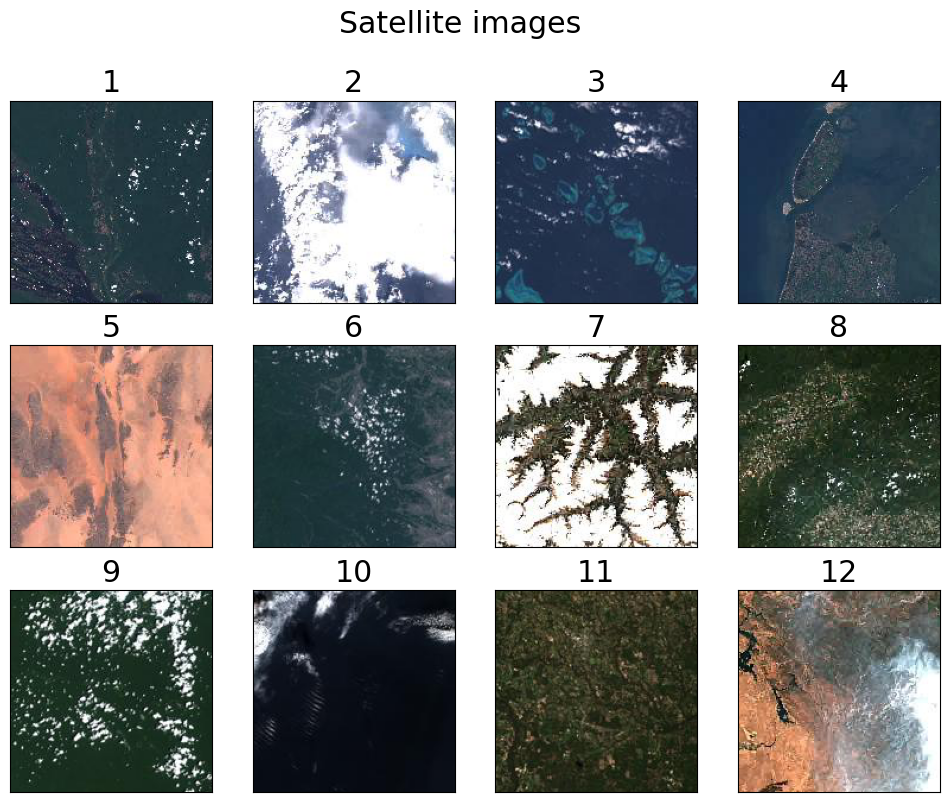

In [90]:
images_part_1 = [
    'S2B_MSIL1C_20230927T142719_N0509_R053_T20MPD_20230927T174905-ql.jpg', 
    'S2B_MSIL1C_20190902T154549_N0208_R111_T18QVM_20190902T203822-ql.jpg', 
    'S2B_MSIL1C_20241003T001109_N0511_R073_T56KKC_20241003T025213-ql.jpg',
    'S2B_MSIL1C_20231017T104939_N0509_R051_T31UFU_20231017T125432-ql.jpg', 
    'S2B_MSIL1C_20231018T101939_N0509_R065_T31REH_20231018T140012-ql.jpg', 
    'S2B_MSIL1C_20240705T012659_N0510_R074_T54SUE_20240705T024824-ql.jpg', 
]
images_part_1 = [os.path.join(os.getcwd(), "..", "data", f"Sat_1", "tci-previews", im) for im in images_part_1]
    
images_part_2 = [
    'S2A_MSIL2A_20230406T102021_N0509_R065_T32TNS_20230406T194357-ql.jpg', 
    'S2A_MSIL2A_20230914T030531_N0509_R075_T50TMK_20230914T083003-ql.jpg', 
    'S2B_MSIL2A_20241011T090819_N0511_R050_T33NVA_20241011T122228-ql.jpg',
    'S2A_MSIL2A_20240920T171011_N0511_R112_T16VEM_20240920T232257-ql.jpg', 
    'S2A_MSIL2A_20241012T161221_N0511_R140_T17RLQ_20241012T222848-ql.jpg', 
    'S2B_MSIL2A_20180726T184029_N0500_R070_T11SKB_20230722T011822-ql.jpg', 
    ]
images_part_2 = [os.path.join(os.getcwd(), "..", "data", f"Sat_2", "tci-previews", im) for im in images_part_2]

TCI_images = np.concatenate([images_part_1, images_part_2])
TCI_images = np.array([mpimg.imread(im)[:343 // 2, :343 // 2] for im in TCI_images])

displayImages(TCI_images, "Satellite images", "preview_images")

In [22]:
rows

2

In [ ]:
different_images = [0, 3, 6, 9, 10]

In [35]:
sorted_bpp = bpp_array[idxs]
sorted_psnr = psnr_array[idxs]

In [36]:

def getAveragedValues(sorted_bpp, sorted_psnr, nbins = 10, operation = "mean"):

    delta_bpp = (max(sorted_bpp) - min(sorted_bpp)) / (nbins - 1)

    bpp_out = np.array([min(sorted_bpp) + (j + 0.5) * delta_bpp for j in range(nbins)])
    psnr_out = np.zeros(nbins)

    for j in range(nbins):
        # Inside the bin
        idxs_inside = ((min(sorted_bpp) + j * delta_bpp <= sorted_bpp) & (sorted_bpp < min(sorted_bpp) + (j + 1) * delta_bpp)).nonzero()
        
        # Store the results
        psnr_inside = sorted_psnr[idxs_inside]
        
        if psnr_inside.shape[0] == 0:
            psnr_out[j] = np.nan
        else:
            if operation == "mean":
                psnr_out[j] = psnr_inside.mean()
            elif operation == "max":
                psnr_out[j] = psnr_inside.max()
            elif operation == "min":
                psnr_out[j] = psnr_inside.min()
            
    # Non nan psnr
    psnr_idxs = (~ np.isnan(psnr_out)).nonzero()[0]
    
    return bpp_out[psnr_idxs], psnr_out[psnr_idxs]

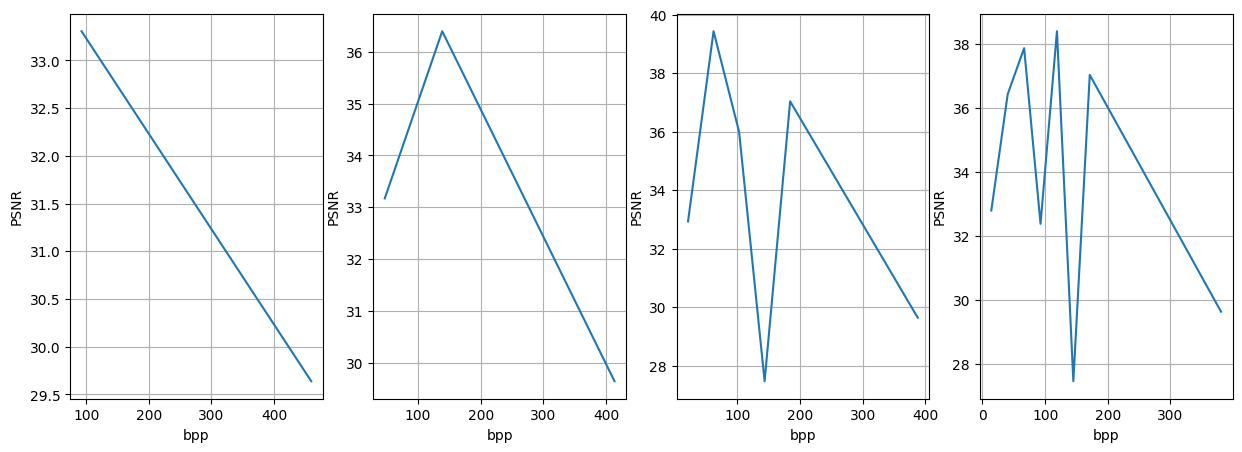

In [37]:
fig, axes = plt.subplots(1,4, figsize = (15, 5))

axes[0].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 3))
axes[0].set_xlabel("bpp")
axes[0].set_ylabel("PSNR");
axes[0].grid()

axes[1].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 5))
axes[1].set_xlabel("bpp")
axes[1].set_ylabel("PSNR")
axes[1].grid();

axes[2].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 10))
axes[2].set_xlabel("bpp")
axes[2].set_ylabel("PSNR");
axes[2].grid()

axes[3].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 15))
axes[3].set_xlabel("bpp")
axes[3].set_ylabel("PSNR");
axes[3].grid()

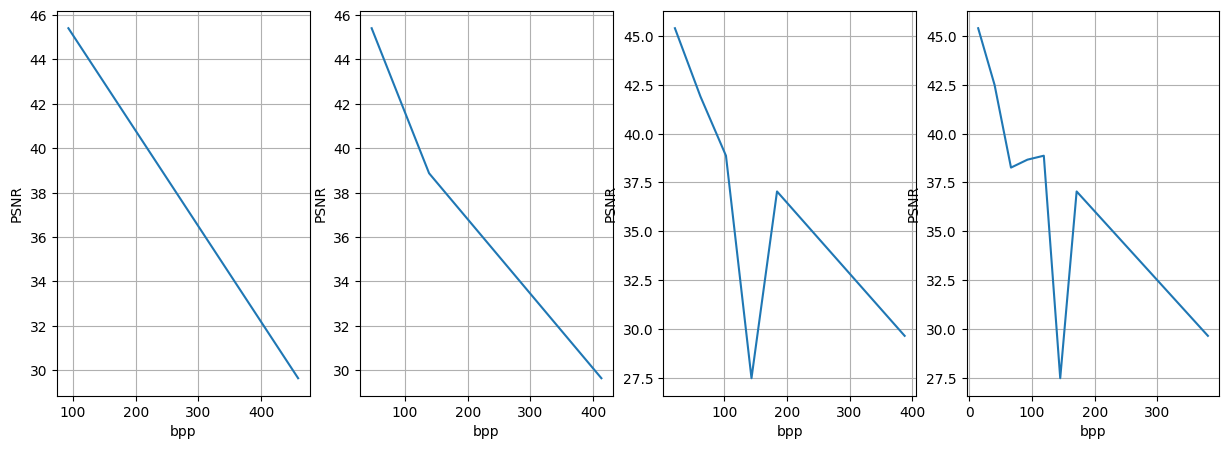

In [38]:
fig, axes = plt.subplots(1,4, figsize = (15, 5))

axes[0].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 3, 'max'))
axes[0].set_xlabel("bpp")
axes[0].set_ylabel("PSNR");
axes[0].grid()

axes[1].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 5, 'max'))
axes[1].set_xlabel("bpp")
axes[1].set_ylabel("PSNR")
axes[1].grid();

axes[2].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 10, 'max'))
axes[2].set_xlabel("bpp")
axes[2].set_ylabel("PSNR");
axes[2].grid()

axes[3].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 15, 'max'))
axes[3].set_xlabel("bpp")
axes[3].set_ylabel("PSNR");
axes[3].grid()

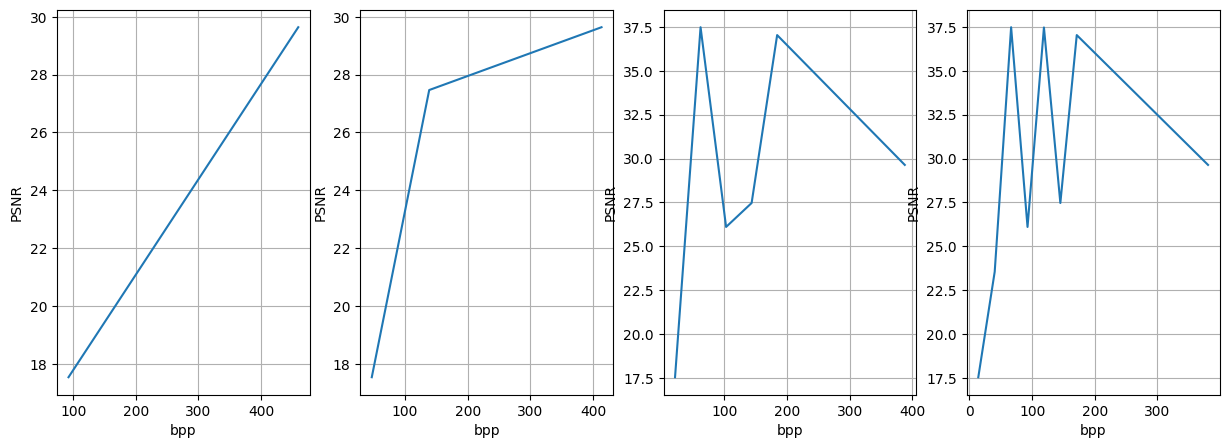

In [39]:
fig, axes = plt.subplots(1,4, figsize = (15, 5))

axes[0].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 3, 'min'))
axes[0].set_xlabel("bpp")
axes[0].set_ylabel("PSNR");
axes[0].grid()

axes[1].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 5, 'min'))
axes[1].set_xlabel("bpp")
axes[1].set_ylabel("PSNR")
axes[1].grid();

axes[2].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 10, 'min'))
axes[2].set_xlabel("bpp")
axes[2].set_ylabel("PSNR");
axes[2].grid()

axes[3].plot(*getAveragedValues(sorted_bpp, sorted_psnr, 15, 'min'))
axes[3].set_xlabel("bpp")
axes[3].set_ylabel("PSNR");
axes[3].grid()